# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [107]:
# Import the required packages
import os
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the *original* dataset...

In [108]:
original_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/train.csv')

In [109]:
original_df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

**TripType** is the column that we should predict. That column is not present in the test set

In [110]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [111]:
original_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0


In [112]:
original_df[original_df.DepartmentDescription=='JEWELRY AND SUNGLASSES']

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
370,40,287,Friday,7.278338e+10,1,JEWELRY AND SUNGLASSES,6802.0
446,36,326,Friday,7.379272e+10,1,JEWELRY AND SUNGLASSES,7095.0
452,999,333,Friday,6.565145e+10,1,JEWELRY AND SUNGLASSES,6812.0
453,999,333,Friday,6.565145e+10,-1,JEWELRY AND SUNGLASSES,6812.0
773,42,513,Friday,6.115665e+10,1,JEWELRY AND SUNGLASSES,556.0
...,...,...,...,...,...,...,...
451594,41,190758,Sunday,8.817760e+10,1,JEWELRY AND SUNGLASSES,38.0
451714,41,190799,Sunday,8.859986e+10,1,JEWELRY AND SUNGLASSES,6409.0
452242,9,190964,Sunday,8.876617e+10,1,JEWELRY AND SUNGLASSES,4108.0
452718,9,191121,Sunday,7.268986e+10,1,JEWELRY AND SUNGLASSES,6602.0


Looking into the columns values...

In [113]:
set(original_df.Weekday)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [114]:
original_df.DepartmentDescription.unique().size

69

In [115]:
original_df.Upc.unique().size

84492

In [116]:
original_df.FinelineNumber.unique().size

5106

In [117]:
set(original_df.DepartmentDescription)

{'1-HR PHOTO',
 'ACCESSORIES',
 'AUTOMOTIVE',
 'BAKERY',
 'BATH AND SHOWER',
 'BEAUTY',
 'BEDDING',
 'BOOKS AND MAGAZINES',
 'BOYS WEAR',
 'BRAS & SHAPEWEAR',
 'CAMERAS AND SUPPLIES',
 'CANDY, TOBACCO, COOKIES',
 'CELEBRATION',
 'COMM BREAD',
 'CONCEPT STORES',
 'COOK AND DINE',
 'DAIRY',
 'DSD GROCERY',
 'ELECTRONICS',
 'FABRICS AND CRAFTS',
 'FINANCIAL SERVICES',
 'FROZEN FOODS',
 'FURNITURE',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'GROCERY DRY GOODS',
 'HARDWARE',
 'HEALTH AND BEAUTY AIDS',
 'HOME DECOR',
 'HOME MANAGEMENT',
 'HORTICULTURE AND ACCESS',
 'HOUSEHOLD CHEMICALS/SUPP',
 'HOUSEHOLD PAPER GOODS',
 'IMPULSE MERCHANDISE',
 'INFANT APPAREL',
 'INFANT CONSUMABLE HARDLINES',
 'JEWELRY AND SUNGLASSES',
 'LADIES SOCKS',
 'LADIESWEAR',
 'LARGE HOUSEHOLD GOODS',
 'LAWN AND GARDEN',
 'LIQUOR,WINE,BEER',
 'MEAT - FRESH & FROZEN',
 'MEDIA AND GAMING',
 'MENS WEAR',
 'MENSWEAR',
 'OFFICE SUPPLIES',
 'OPTICAL - FRAMES',
 'OPTICAL - LENSES',
 'OTHER DEPARTMENTS',
 'PAINT AND ACCESSORIES',
 'PER

**There** are `nan`s in the column, let us find them...

In [118]:
original_df[original_df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
1292,32,845,Friday,NaN,1,NaN,NaN
1293,32,845,Friday,NaN,1,NaN,NaN
1577,40,1004,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


When the description is NaN, then the Upc and FinelineNumber are both NaN?

In [119]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [120]:
original_df[original_df.Upc.isna()].sample(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
77859,5,32574,Wednesday,NaN,1,PHARMACY RX,NaN
286598,38,120598,Wednesday,NaN,1,NaN,NaN
117442,5,50916,Saturday,NaN,1,PHARMACY RX,NaN
168770,5,71001,Tuesday,NaN,1,PHARMACY RX,NaN
168245,5,70675,Tuesday,NaN,1,PHARMACY RX,NaN


In [121]:
#Peso de los valores nulos de UPC en el dataset
original_df.Upc.isna().sum()/original_df.TripType.sum()

0.00010839944419819341


But it may be the case that Upc is NaN but not the description...

In [122]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

In [123]:
original_df[(original_df.FinelineNumber.isna()==False)&(original_df.DepartmentDescription=='PHARMACY RX')].groupby(by=['TripType','FinelineNumber']).count()

VisitNumber  Weekday  ...  ScanCount  DepartmentDescription
TripType FinelineNumber                        ...                                  
5        1335.0                    4        4  ...          4                      4
         1336.0                    1        1  ...          1                      1
         4822.0                   62       62  ...         62                     62
         5615.0                   43       43  ...         43                     43
34       5615.0                    1        1  ...          1                      1
39       5615.0                    1        1  ...          1                      1
999      4822.0                    2        2  ...          2                      2
         5615.0                    2        2  ...          2                      2

[8 rows x 5 columns]

In [124]:
with pd.option_context('display.max_rows', None):
    display(original_df[original_df.DepartmentDescription == 'PHARMACY RX'].groupby(by=['TripType','DepartmentDescription'])[['DepartmentDescription']].count())

,,DepartmentDescription
TripType,DepartmentDescription,
4,PHARMACY RX,3
5,PHARMACY RX,1856
7,PHARMACY RX,2
8,PHARMACY RX,4
9,PHARMACY RX,2
20,PHARMACY RX,1
25,PHARMACY RX,5
27,PHARMACY RX,1
34,PHARMACY RX,2


In [125]:
 original_df[(original_df.FinelineNumber.isna())&(original_df.DepartmentDescription=='PHARMACY RX')].count()

TripType                 1880
VisitNumber              1880
Weekday                  1880
Upc                         0
ScanCount                1880
DepartmentDescription    1880
FinelineNumber              0
dtype: int64

In [126]:
df=original_df

In [127]:
df[df.duplicated(keep=False)].sort_values(by='VisitNumber')

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
267,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
268,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
342,40,274,Friday,4.127197e+09,1,FROZEN FOODS,9100.0
350,40,274,Friday,4.127197e+09,1,FROZEN FOODS,9100.0
502,40,358,Friday,1.820011e+09,1,"LIQUOR,WINE,BEER",105.0
...,...,...,...,...,...,...,...
452939,24,191177,Sunday,7.065200e+09,1,COOK AND DINE,905.0
453018,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
453029,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
453205,44,191277,Sunday,6.791453e+09,1,IMPULSE MERCHANDISE,347.0


In [128]:
mask = (original_df.FinelineNumber.isna())&(df.DepartmentDescription=='PHARMACY RX')
column_name = 'FinelineNumber'
original_df.loc[mask, column_name] = 4822.0

In [129]:
 df[(df.FinelineNumber.isna())&(df.DepartmentDescription=='PHARMACY RX')]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


Upc and FinelineNumber are both NaN at the same time

Our last step in this analysis is to see how balanced is the data...

In [130]:
bins = set(original_df.TripType)

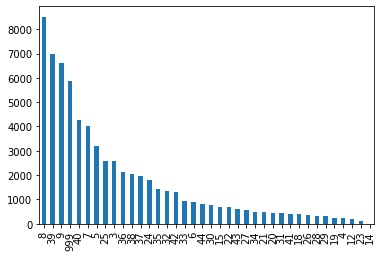

In [131]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

**Unbalanced!!!**

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently:

In [132]:
df = original_df.drop(["TripType"], axis=1)

In [133]:
df.sample(5)

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
344186,145488,Sunday,7.874202e+09,1,DSD GROCERY,4631.0
272124,114007,Tuesday,8.395460e+10,1,JEWELRY AND SUNGLASSES,7077.0
442824,187620,Sunday,6.053881e+10,-1,HARDWARE,5007.0
166852,70040,Tuesday,8.660071e+09,1,GROCERY DRY GOODS,2908.0
398558,168804,Thursday,8.218231e+10,1,BOYS WEAR,5150.0


Now, we create the dummy columns

In [134]:
from hashlib import md5
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

department_description_df = pd.DataFrame(columns=('hash', 'description'))
department_description_df['description']= df.DepartmentDescription.unique()
department_description_df['hash'] = department_description_df['description'].apply(hashit)



In [135]:
def get_dia_laboral(nombre_dia):
    if nombre_dia in ['Wednesday', 'Thursday', 'Friday', 'Monday','Tuesday']:
        return 'Dia laboral'
    else:
        return 'Fin de semana'

In [136]:
df['tipo_dia']=df.Weekday.apply(lambda x:get_dia_laboral(x))
df.sample(5)

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,tipo_dia
392558,165926,Wednesday,6.454169e+10,1,CELEBRATION,805.0,Dia laboral
269507,112626,Monday,3.700089e+09,1,PERSONAL CARE,5406.0,Dia laboral
150883,63315,Monday,2.840004e+09,1,IMPULSE MERCHANDISE,807.0,Dia laboral
392089,165733,Wednesday,3.040077e+09,1,HOUSEHOLD PAPER GOODS,3006.0,Dia laboral
189011,79973,Wednesday,7.861620e+10,1,DSD GROCERY,3005.0,Dia laboral


In [137]:
    df = df.drop(["Upc"], axis=1)


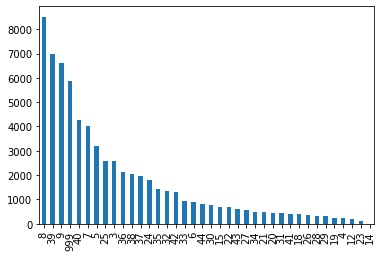

In [138]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

In [139]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber,tipo_dia
0,5,Friday,-1,FINANCIAL SERVICES,1000.0,Dia laboral
1,9,Friday,1,IMPULSE MERCHANDISE,115.0,Dia laboral
2,9,Friday,1,PRODUCE,103.0,Dia laboral
3,9,Friday,1,PRODUCE,5501.0,Dia laboral
4,10,Friday,1,DSD GROCERY,2008.0,Dia laboral
...,...,...,...,...,...,...
453406,191344,Sunday,1,BEAUTY,3405.0,Fin de semana
453407,191344,Sunday,1,WIRELESS,1712.0,Fin de semana
453408,191344,Sunday,1,BEAUTY,3405.0,Fin de semana
453409,191347,Sunday,1,DAIRY,1512.0,Fin de semana


In [140]:
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)


In [141]:
    df = pd.get_dummies(df, columns=["tipo_dia"], dummy_na=True)


In [56]:
df_2 = df.groupby(["VisitNumber", "FinelineNumber","DepartmentDescription"], as_index=False).count()
df_2[(df_2.FinelineNumber==279.0) & (df_2.DepartmentDescription!='FINANCIAL SERVICES')]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,VisitNumber,FinelineNumber,DepartmentDescription,Weekday,Upc,ScanCount,tipo_dia
83,253,279.0,58,1,1,1,1
94,281,279.0,58,1,1,1,1
110,317,279.0,58,1,1,1,1
150,403,279.0,58,1,1,1,1
151,407,279.0,58,1,1,1,1
...,...,...,...,...,...,...,...
66235,189134,279.0,58,1,1,1,1
66282,189296,279.0,58,1,1,1,1
66402,189644,279.0,58,1,1,1,1
66430,189704,279.0,58,1,1,1,1


In [36]:
df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,tipo_dia
0,5,0,6.811315e+10,-1,58,1000.0,0
1,9,0,1.070081e+09,1,49,115.0,0
2,9,0,3.107000e+03,1,34,103.0,0
3,9,0,4.011000e+03,1,34,5501.0,0
4,10,0,6.414410e+09,1,61,2008.0,0
...,...,...,...,...,...,...,...
453406,191344,3,7.315096e+10,1,64,3405.0,1
453407,191344,3,6.505300e+10,1,11,1712.0,1
453408,191344,3,7.918131e+09,1,64,3405.0,1
453409,191347,3,4.190008e+09,1,13,1512.0,1


Now, we group by the VisitNumber and Weekday (they should be the same), and add all values for ScanCount, and the one-hot encoding of DepartmentDescriptioin

In [37]:
df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

In [38]:
df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,tipo_dia
0,5,0,6.811315e+10,-1,58,1000.0,0
1,9,0,1.070088e+09,3,117,5719.0,0
2,10,0,1.700927e+10,3,152,10073.0,0
3,11,0,2.273895e+10,4,165,7499.0,0
4,12,0,1.832173e+11,7,254,15639.0,0
...,...,...,...,...,...,...,...
67024,191329,3,5.830656e+11,20,674,75311.0,20
67025,191337,3,2.659169e+11,27,774,113908.0,28
67026,191343,3,4.516225e+11,9,255,33991.0,7
67027,191344,3,1.614572e+11,5,267,15127.0,5


In [145]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    df.drop_duplicates(keep='first', ignore_index=True, inplace=True)

    # drop the columns we won't use (it may be good to use them somehow)
    df = df.drop(["Upc"], axis=1)

    mask = (df.FinelineNumber.isna())&(df.DepartmentDescription=='PHARMACY RX')
    column_name = 'FinelineNumber'
    df.loc[mask, column_name] = 4822.0

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    #df = df.groupby(["VisitNumber", "Weekday","FinelineNumber"], as_index=False).sum()
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

In [267]:
def transform_data2(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    
    # drop the columns we won't use (it may be good to use them somehow)
    df = df.drop(["Upc","FinelineNumber"], axis=1)
   
    #Borramos duplicados
    df.drop_duplicates(keep='first', ignore_index=True, inplace=True)
    
    #Reemplazamos en FinelineNumber en DepartmentDescription PHARMACY RX
    #mask = (df.FinelineNumber.isna())&(df.DepartmentDescription=='PHARMACY RX')
    #column_name = 'FinelineNumber'
    #df.loc[mask, column_name] = 4822.0

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)
    
    #Creamos una feature para el tipo de dia que es: laboral o fin de semana
    #df['tipo_dia']=df.Weekday.apply(lambda x:get_dia_laboral(x))
    #df = pd.get_dummies(df, columns=["tipo_dia"], dummy_na=False)

    # get train and test back
    df_train = df[df.is_train_set != 0].dropna()
    df_test = df[df.is_train_set == 0].dropna()
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

Load the data...

In [146]:
X, y, XX, yy = transform_data("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/train.csv", "https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/test.csv")

Create the model and evaluate it

In [147]:
X.shape

(67029, 80)

In [148]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it could be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
# results dataframe is used to store the computed results
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [152]:
# we will use a DesicionTree to classify and GridSearch to determine the parameters
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#tree_param = {'criterion':('gini', 'entropy'),# 'min_samples_leaf':(1, 2, 5,8),
#              'min_samples_leaf': [1,2,3,4],
#              'min_samples_split':(2,100) }
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2,4,5),
              'min_samples_split':(2, 3, 5, 10, 50, 100)}
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, cv=3, scoring='accuracy') #scoring='balanced_accuracy')
tree_clf.fit(X_train, y_train)
best_tree_clf = tree_clf.best_estimator_

In [153]:
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.6399616368286445
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


**And finally**, we predict the unknown label for the testing set

In [154]:
#RANDOM FOREST
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(random_state=2)
clf.fit(X, y);

In [156]:
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(y == predictions))/float(y.size)*100))

Accuracy: 99 


In [158]:
predictions = clf.predict(XX)


In [159]:
submission2 = pd.DataFrame(list(zip(XX.VisitNumber, predictions)), columns=["VisitNumber", "TripType"])

In [160]:
submission2.to_csv("sample_data/submission_randomforest.csv", header=True, index=False)

Exportamos Resultados


In [213]:
X.shape, XX.shape

((67029, 73), (28645, 73))

In [214]:
yy = results.clf.iloc[0].predict(XX)

The last thing we do is generating a file that should be *submitted* on kaggle

In [215]:
submission = pd.DataFrame(list(zip(XX.VisitNumber, yy)), columns=["VisitNumber", "TripType"])

In [216]:
submission.to_csv("sample_data/submission.csv", header=True, index=False)